
# TASK 2 (Data analysis)

### In this task, use your data analytics skills to answer the question posed in the Task 1. Depending upon your chosen question, you will typically have to perform Exploratory Data Analysis (EDA), data pre-processing, statistics-based data analysis, data visualisation and use unsupervised machine learning algorithms (e.g., clustering).

### Business Analytical Question:  What are the key determinants of pricing for Airbnb listings in NYC? How do factors like location, property type, and reviews influence the price?



<a id = "table-of-content"></a>
# Table of Content

- [Business Understanding](#business_undestanding)
- [Data Understanding](#data_undestanding)
- [Data Preparation](#data_preparation)
- [Modelling and Evaluation](#modelling_n_evaluation)
- [Conclusion](#conclusion)

[link text](https:// [link text](https://))<a id = "business_undestanding"></a>
# Business Understanding
What are the key determinants of pricing for Airbnb listings in NYC? How do factors like location, property type, and reviews influence the price?

<a id = "data_understanding"></a>
# Data Understanding
Here we will look at the data and hopefully find interesting patterns in it.

We will try and see if the columns below have a strong correlation to the *price*:

* name - Looks like a description
* neighbourhood_group
* neighbourhood 
* latitude 
* longitude 
* room_type 
* price
* minimum_nights 
* number_of_reviews 
* last_review
* reviews_per_month 
* calculated_host_listings_count
* availability_365


In [2]:
#import pandas and numpy for data preprocessing and manipulation

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
!pip install geodatasets
from IPython.display import Markdown

# Set the aesthetics for the plots
sns.set(style="whitegrid")

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

^C
ERROR: Operation cancelled by user
/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


In [3]:
def summary(data):
    # Check if input is a DataFrame or Series
    if isinstance(data, pd.Series):
        data = data.to_frame()
    elif not isinstance(data, pd.DataFrame):
        raise ValueError("Input must be a pandas DataFrame or Series")

    # Describe the data to get basic stats
    desc = data.describe(percentiles=[.25, .5, .75]).transpose()

    # Rename columns
    columns_rename = {
        'min': 'Min.',
        '25%': '1st Qu.',
        '50%': 'Median',
        'mean': 'Mean',
        '75%': '3rd Qu.',
        'max': 'Max.'
    }
    desc.rename(columns=columns_rename, inplace=True)

    # Count missing values
    desc["NA's"] = data.shape[0] - desc['count']
    desc.drop(columns=['count'], inplace=True)
    desc = desc.applymap(lambda x: "{:,.2f}".format(x))

    # Reorder columns
    column_order = ['Min.', '1st Qu.', 'Median', 'Mean', '3rd Qu.', 'Max.', "NA's"]
    desc = desc[column_order]

    return display(Markdown(desc.to_markdown()))

In [4]:
# mounting google drive and loading csv file into dataframe

# folder_path = '/content/drive/MyDrive/TeamProject/AB_NYC_2019.csv'
folder_path = '/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv'

# from google.colab import drive
# drive.mount('/content/drive')

df = pd.read_csv(folder_path)
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

In [5]:
#inspect data
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [6]:
#number of rows and columns
df.shape

(48895, 16)

In [7]:
#column names
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
#check data types
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## Numerical columns

In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64


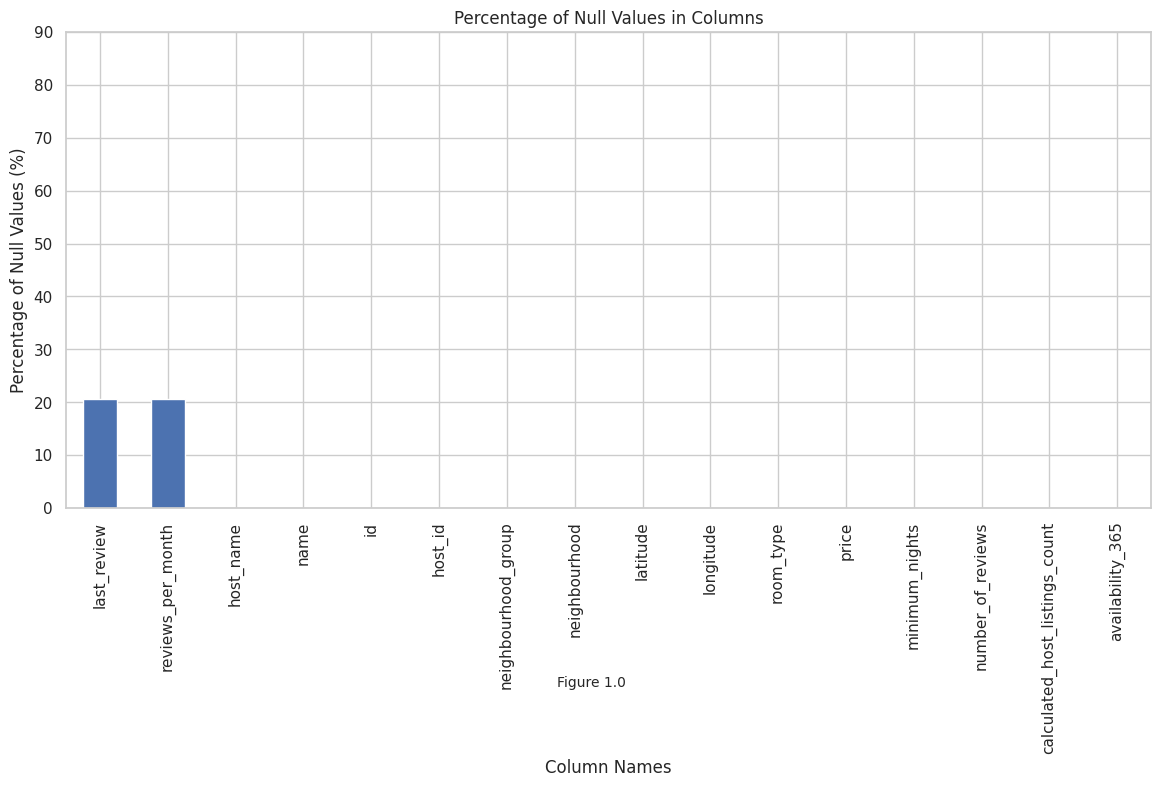

In [10]:
# Calculate the percentage of null values for each column
total_rows = len(df)
null_counts = df.isnull().sum()

# Sort the columns in descending order of null value counts
sorted_null_counts = null_counts.sort_values(ascending=False)

# Select top 20 columns
top_20_null_counts = sorted_null_counts.head(20)

# Calculate percentage for these top 20 columns
top_20_null_percentage = (top_20_null_counts / total_rows) * 100

# Plot
fig, ax = plt.subplots(figsize=(14, 7))
top_20_null_percentage.plot(kind='bar')
ax.set_title('Percentage of Null Values in Columns')
ax.set_ylabel('Percentage of Null Values (%)')
ax.set_xlabel('Column Names')
ax.set_yticks(np.arange(0, 100, 10))
#Add caption
fig.subplots_adjust(bottom=0.2)  # Adjust the bottom margin to make space for the caption
fig.text(0.5, -0.05, "Figure 1.0", ha='center', va='center', fontsize=10, wrap=True)
plt.show()

In [11]:
# Handling missing values
df['name'].fillna('Unknown', inplace=True) #replace missing names with 'unknown'
df['host_name'].fillna('Unknown', inplace=True) #replace missing host names with 'unknown'
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')  # Convert to datetime
df['last_review'].fillna(pd.Timestamp('1900-01-01'), inplace=True)  # Placeholder for no reviews
df['reviews_per_month'].fillna(0, inplace=True)  # Replacing no reviews with 0


In [12]:
#check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


<Axes: >

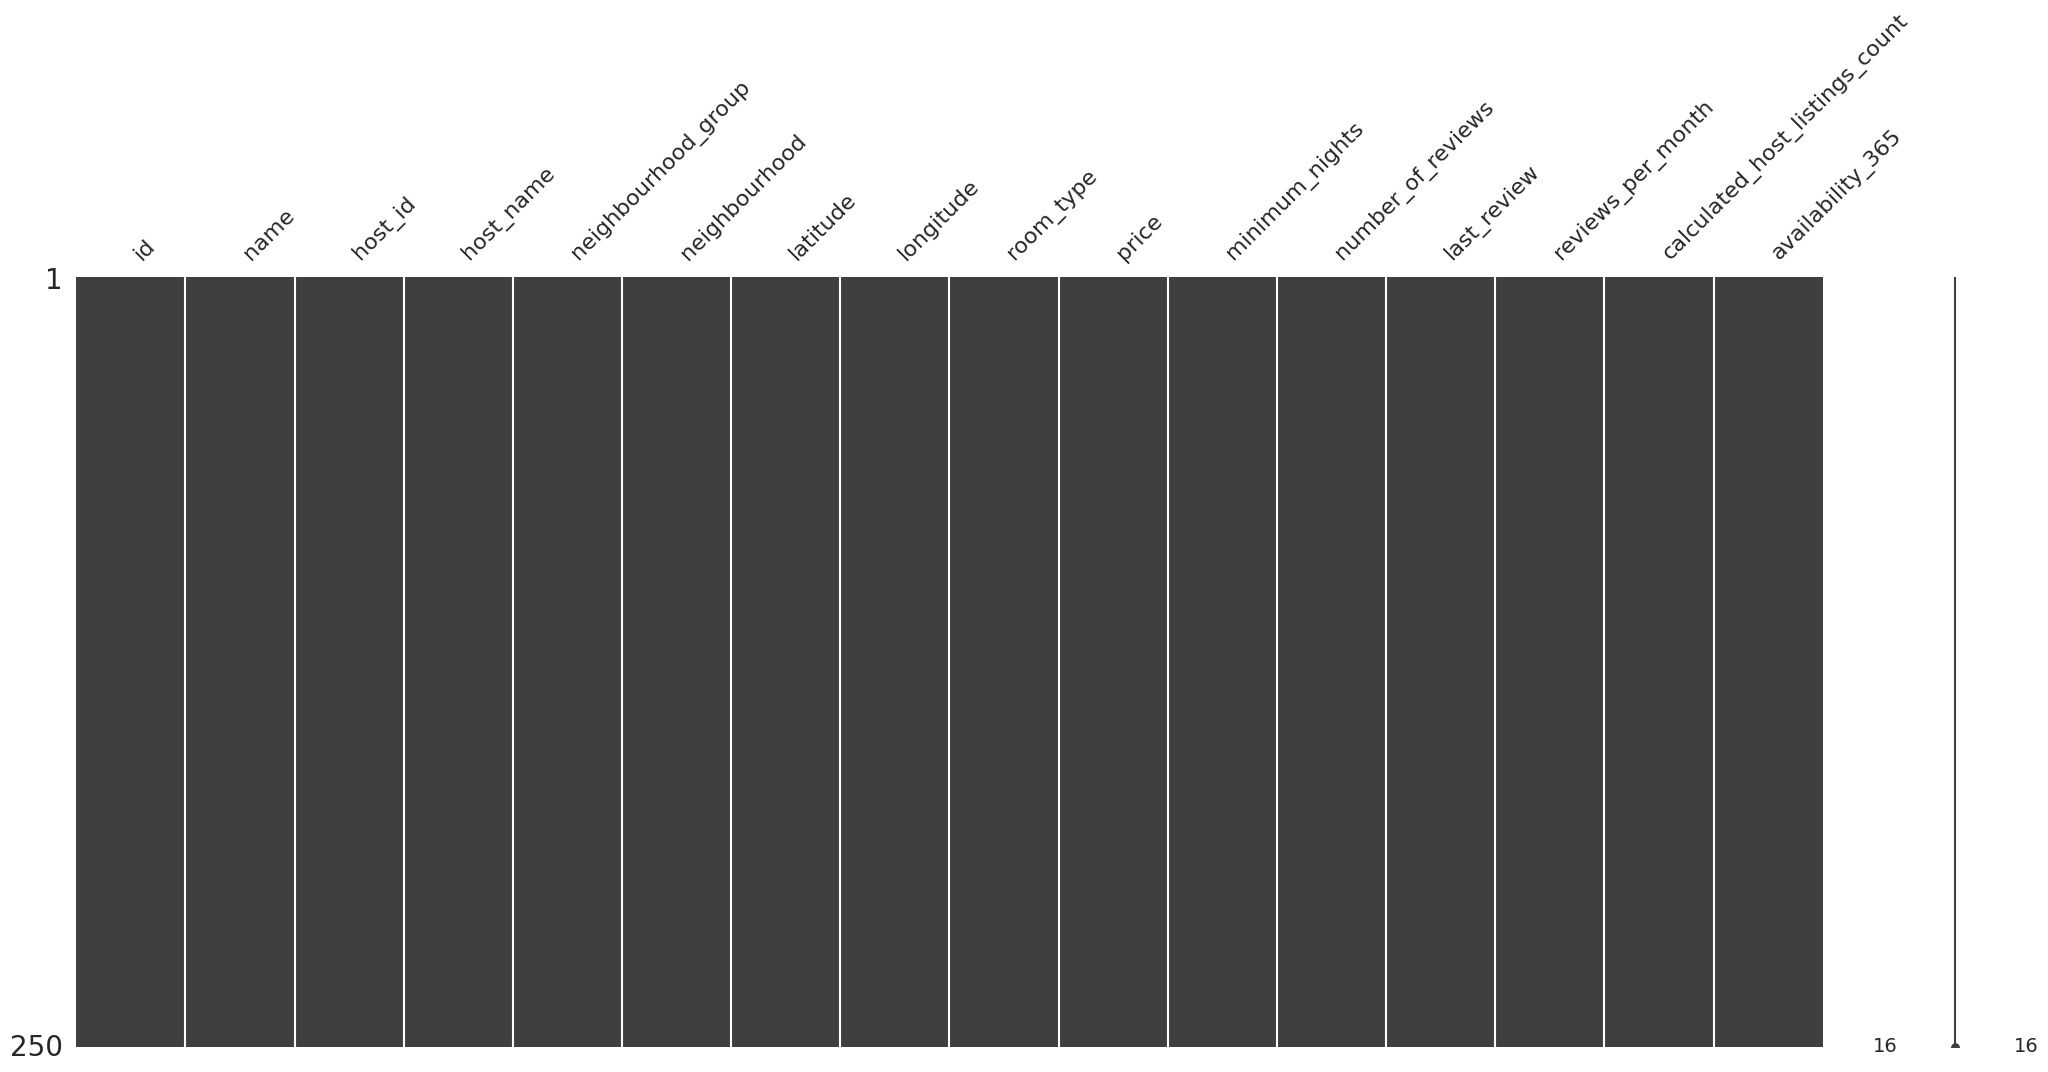

In [13]:
msno.matrix(df.sample(250))

/opt/conda/lib/python3.10/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/opt/conda/lib/python3.10/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

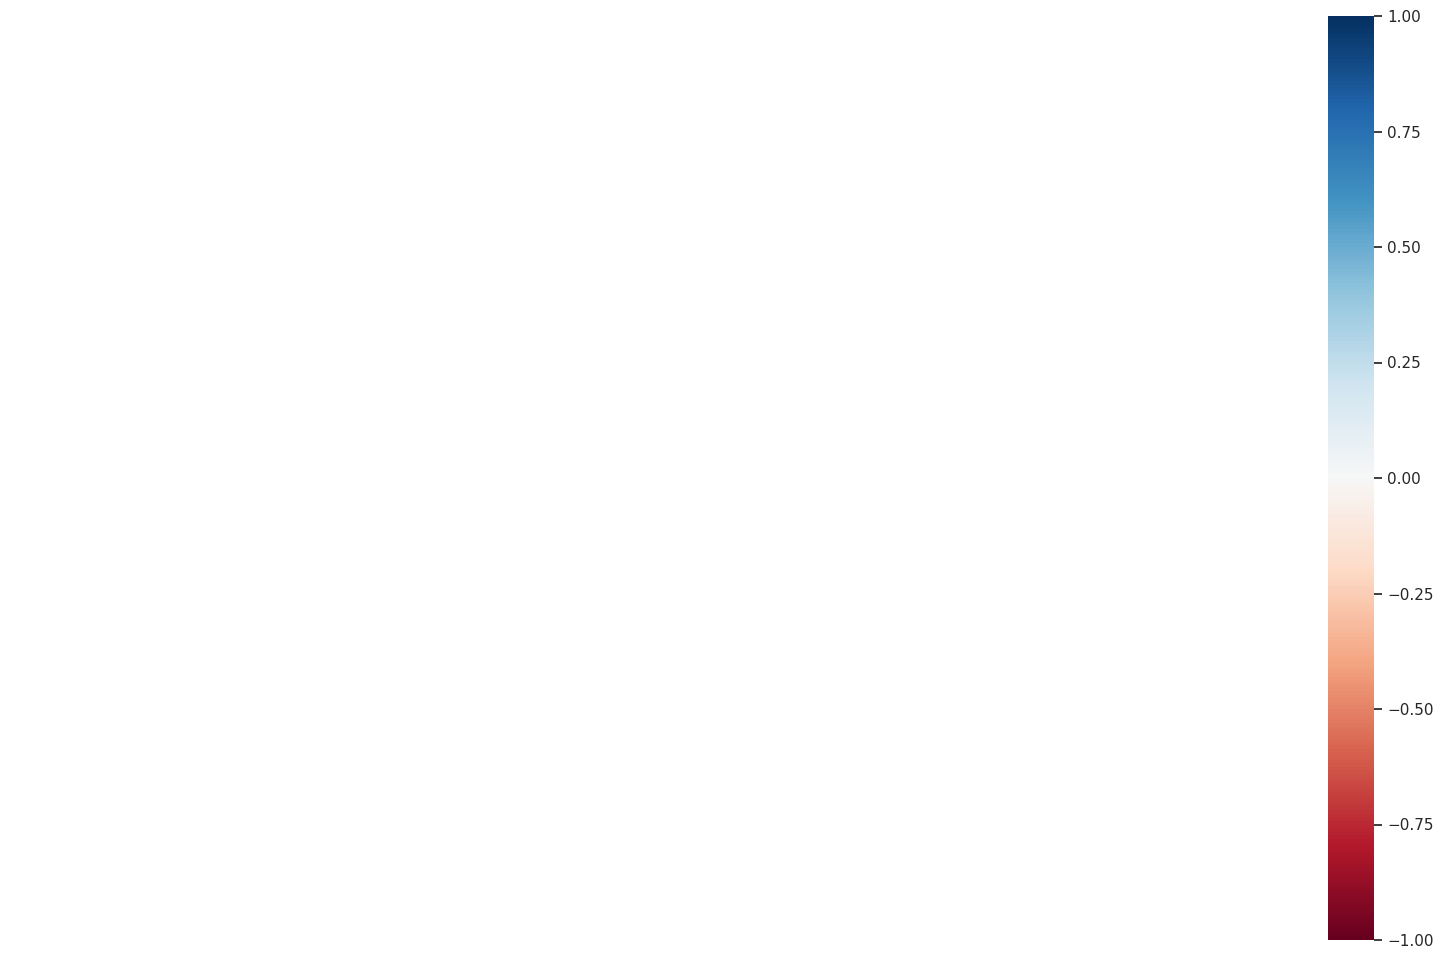

In [14]:
msno.heatmap(df)

## Univariate Analysis

### Price
Looks like we have some prices that are 0. It does not make sense why prices for a listing should be zero so imputing might be necessary.
If imputing is required then I propose using an unsupervised imputing like KNN.

In [15]:
df[df['price'] <= 0].size

176

In [16]:
df[df['price'] <= 0].sort_values(by='price', ascending=True)

id                                               name    host_id  \
23161  18750597  Huge Brooklyn Brownstone Living, Close to it all.    8993084   
25433  20333471      ★Hostel Style Room | Ideal Traveling Buddies★  131697576   
25634  20523843    MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)   15787004   
25753  20608117                    Sunny, Quiet Room in Greenpoint    1641537   
25778  20624541      Modern apartment in the heart of Williamsburg   10132166   
25794  20639628  Spacious comfortable master bedroom with nice ...   86327101   
25795  20639792  Contemporary bedroom in brownstone with nice view   86327101   
25796  20639914       Cozy yet spacious private brownstone bedroom   86327101   
26259  20933849                              the best you can find   13709292   
26841  21291569  Coliving in Brooklyn! Modern design / Shared room  101970559   
26866  21304320             Best Coliving space ever! Shared room.  101970559   

          host_name neighbourhood_group       neighbourhood  latitude  \
23161      Kimberly            Brooklyn  Bedford-Stuyvesant  40.69023   
25433        Anisha               Bronx     East Morrisania  40.83296   
25634  Martial Loft            Brooklyn            Bushwick  40.69467   
25753        Lauren            Brooklyn          Greenpoint  40.72462   
25778       Aymeric            Brooklyn        Williamsburg  40.70838   
25794       Adeyemi            Brooklyn  Bedford-Stuyvesant  40.68173   
25795       Adeyemi            Brooklyn  Bedford-Stuyvesant  40.68279   
25796       Adeyemi            Brooklyn  Bedford-Stuyvesant  40.68258   
26259        Qiuchi           Manhattan         Murray Hill  40.75091   
26841        Sergii            Brooklyn            Bushwick  40.69211   
26866        Sergii            Brooklyn            Bushwick  40.69166   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
23161  -73.95428     Private room      0               4                  1   
25433  -73.88668     Private room      0               2                 55   
25634  -73.92433     Private room      0               2                 16   
25753  -73.94072     Private room      0               2                 12   
25778  -73.94645  Entire home/apt      0               5                  3   
25794  -73.91342     Private room      0               1                 93   
25795  -73.91170     Private room      0               1                 95   
25796  -73.91284     Private room      0               1                 95   
26259  -73.97597  Entire home/apt      0               3                  0   
26841  -73.90670      Shared room      0              30                  2   
26866  -73.90928      Shared room      0              30                  5   

      last_review  reviews_per_month  calculated_host_listings_count  \
23161  2018-01-06               0.05                               4   
25433  2019-06-24               2.56                               4   
25634  2019-05-18               0.71                               5   
25753  2017-10-27               0.53                               2   
25778  2018-01-02               0.15                               1   
25794  2019-06-15               4.28                               6   
25795  2019-06-21               4.37                               6   
25796  2019-06-23               4.35                               6   
26259  1900-01-01               0.00                               1   
26841  2019-06-22               0.11                               6   
26866  2019-05-24               0.26                               6   

       availability_365  
23161                28  
25433               127  
25634                 0  
25753                 0  
25778                73  
25794               176  
25795               232  
25796               222  
26259                 0  
26841               333  
26866               139

In [17]:
# Drop all rows with a price 0
df = df[df['price'] > 0]

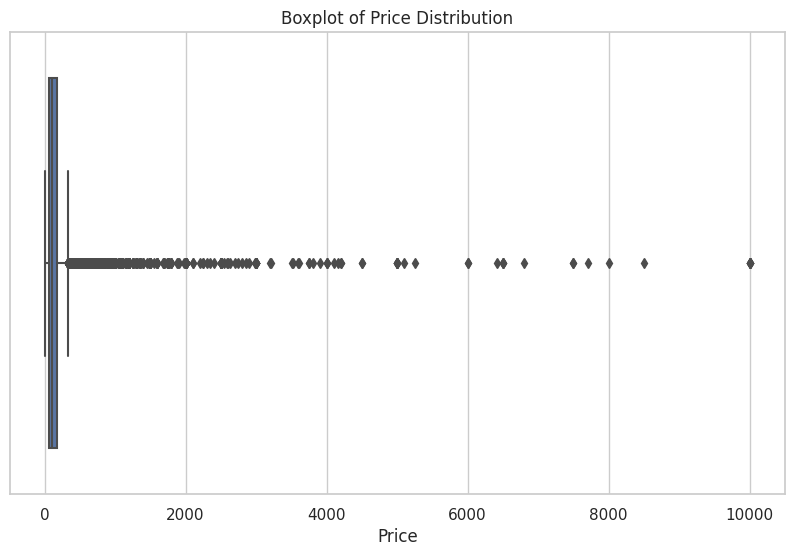

In [18]:
#Distribution of Prices,
# Create a boxplot for the price distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price Distribution')
plt.xlabel('Price')
plt.show()

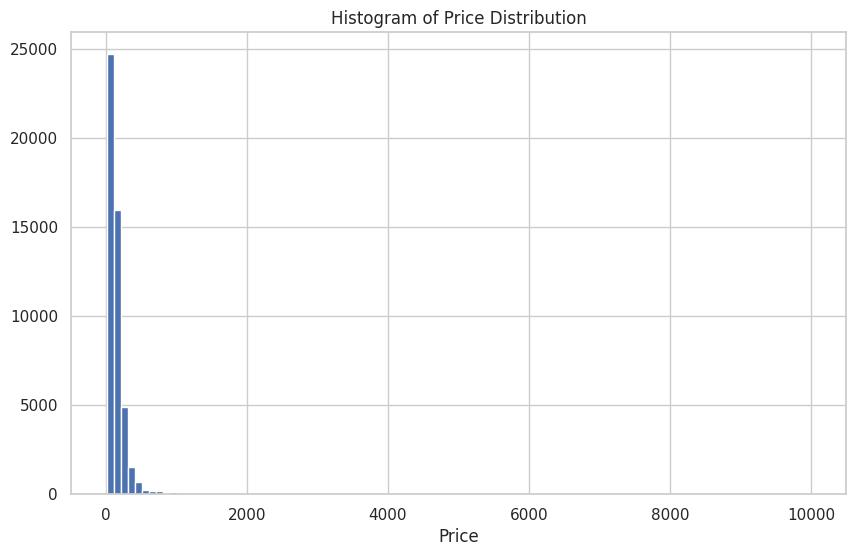

In [19]:
# Create a boxplot for the price distribution
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=100)
plt.title('Histogram of Price Distribution')
plt.xlabel('Price')
plt.show()

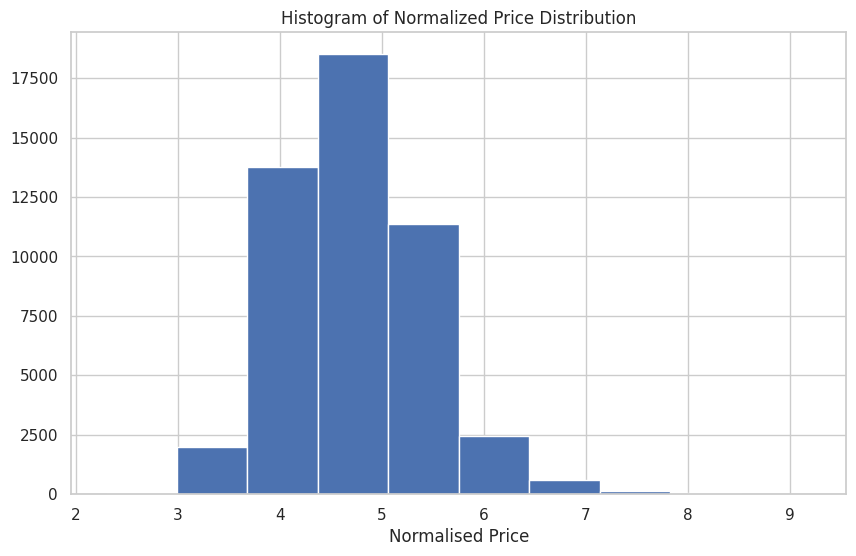

In [25]:
df['normalised_price'] = np.log(df['price'])
# Create a boxplot for the price distribution
plt.figure(figsize=(10, 6))
plt.hist(df['normalised_price'], bins=10)
plt.title('Histogram of Normalized Price Distribution')
plt.xlabel('Normalised Price')
plt.show()
# df['normalised_price'].min()

### Room Type and Price

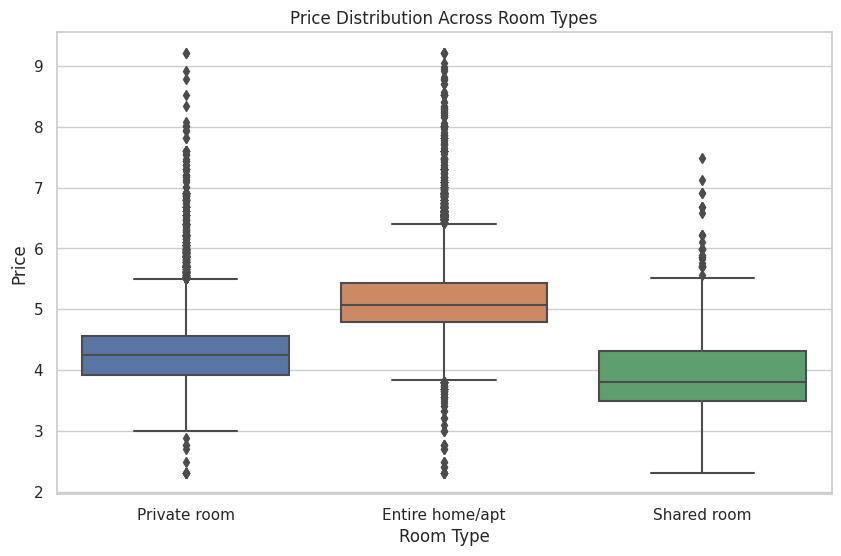

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='normalised_price', data=df)
plt.title('Price Distribution Across Room Types')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

In [28]:
#Extract numerical features for examination
numeric_df = df.select_dtypes(include=[np.number])
num_columns = numeric_df.columns

##Extract categorical features for examination
categorical_df = df.select_dtypes(include=['O', 'object'])
cat_columns = categorical_df.columns

### Name
This is just column that describes the bnb. Not sure any univariate analysis can be performed on this.

In [29]:
df.head(50)['name']

0                    Clean & quiet apt home by the park
1                                 Skylit Midtown Castle
2                   THE VILLAGE OF HARLEM....NEW YORK !
3                       Cozy Entire Floor of Brownstone
4      Entire Apt: Spacious Studio/Loft by central park
5             Large Cozy 1 BR Apartment In Midtown East
6                                       BlissArtsSpace!
7                      Large Furnished Room Near B'way 
8                    Cozy Clean Guest Room - Family Apt
9                    Cute & Cozy Lower East Side 1 bdrm
10                     Beautiful 1br on Upper West Side
11                      Central Manhattan/near Broadway
12       Lovely Room 1, Garden, Best Area, Legal rental
13     Wonderful Guest Bedroom in Manhattan for SINGLES
14                        West Village Nest - Superhost
15                     Only 2 stops to Manhattan studio
16                    Perfect for Your Parents + Garden
17                                      Chelsea 

### Neighbourhood Group

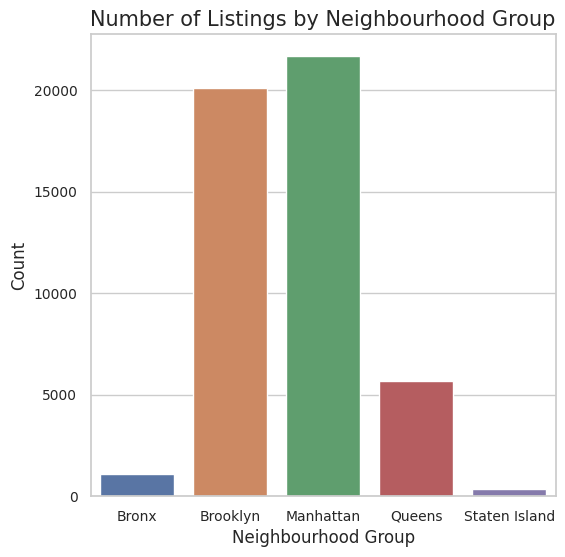

In [30]:
#Get a count by neighbourhood_group
neighbourhood_group_count = df.groupby('neighbourhood_group').agg('count').reset_index()

#Plot the count by neighbourhood_group
fig, ax1 = plt.subplots(1,1, figsize=(6,6)
                       )
sns.barplot(x='neighbourhood_group', y='id', data=neighbourhood_group_count, ax=ax1)

ax1.set_title('Number of Listings by Neighbourhood Group', fontsize=15)
ax1.set_xlabel('Neighbourhood Group', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='both', labelsize=10)

In [31]:
import geopandas as gpd
from geodatasets import get_path
# Ref: https://www.kaggle.com/code/geowiz34/maps-of-nyc-airbnbs-with-python
#Here we are using geopandas to bring in a base layer of NYC boroughs
nyc = gpd.read_file(get_path('nybb'))
nyc.rename(columns={'BoroName':'neighbourhood_group'}, inplace=True)
nyc.head(5)

ModuleNotFoundError: No module named 'geodatasets'

In [32]:
ng_geo = nyc.merge(neighbourhood_group_count, on='neighbourhood_group')
ng_geo.head()

NameError: name 'nyc' is not defined

In [ ]:
#Plot the count by borough into a map
fig,ax = plt.subplots(1,1, figsize=(10,10))
ng_geo.plot(column='id', cmap='viridis_r', alpha=.5, ax=ax, legend=True)
ng_geo.apply(lambda x: ax.annotate(text=x.neighbourhood_group, color='black', xy=x.geometry.centroid.coords[0],ha='center'), axis=1)
plt.title("Number of Airbnb Listings by NYC Neighbourhood Group")
plt.axis('off')

In [ ]:
df.head()

### Neighbourhood 

### Latitude and Longitude 


In [46]:
# Ref: https://www.kaggle.com/code/alexisbcook/interactive-maps#Heatmaps
import folium
from folium.plugins import HeatMap

# Create a base map
m_5 = folium.Map(location=[40.730610, -73.935242], tiles='cartodbpositron', zoom_start=11)

# Add a heatmap to the base map
HeatMap(data=df[['latitude', 'longitude']], radius=10, widtd=500, height=500).add_to(m_5)

# Display the map
m_5

### Room Type 

In [70]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [74]:
fig = px.bar(df, x='room_type', y='price')
fig.show()

### Minimum Nights 

In [48]:
summary(df['minimum_nights'])

|                |   Min. |   1st Qu. |   Median |   Mean |   3rd Qu. | Max.     |   NA's |
|:---------------|-------:|----------:|---------:|-------:|----------:|:---------|-------:|
| minimum_nights |      1 |         1 |        3 |   7.03 |         5 | 1,250.00 |      0 |

In [49]:
fig = go.Figure(data=go.Violin(y=df['minimum_nights'], box_visible=True, meanline_visible=True, x0='Minimum Nights'))
fig.show()

### Number of Reviews 


In [50]:
summary(df['number_of_reviews'])

|                   |   Min. |   1st Qu. |   Median |   Mean |   3rd Qu. |   Max. |   NA's |
|:------------------|-------:|----------:|---------:|-------:|----------:|-------:|-------:|
| number_of_reviews |      0 |         1 |        5 |  23.27 |        24 |    629 |      0 |

In [51]:
fig = go.Figure(data=go.Violin(y=df['number_of_reviews'], box_visible=True, meanline_visible=True, x0='Number of Reviews'))
fig.show()

### Last Review

### Reviews per Month 


In [52]:
summary(df['reviews_per_month'])

|                   |   Min. |   1st Qu. |   Median |   Mean |   3rd Qu. |   Max. |   NA's |
|:------------------|-------:|----------:|---------:|-------:|----------:|-------:|-------:|
| reviews_per_month |      0 |      0.04 |     0.37 |   1.09 |      1.58 |   58.5 |      0 |

In [53]:
fig = go.Figure(data=go.Violin(y=df['reviews_per_month'], box_visible=True, meanline_visible=True, x0='Reviews per Month'))
fig.show()

### Calculated Host Listings Count


In [54]:
summary(df['calculated_host_listings_count'])

|                                |   Min. |   1st Qu. |   Median |   Mean |   3rd Qu. |   Max. |   NA's |
|:-------------------------------|-------:|----------:|---------:|-------:|----------:|-------:|-------:|
| calculated_host_listings_count |      1 |         1 |        1 |   7.14 |         2 |    327 |      0 |

In [55]:
fig = go.Figure(data=go.Violin(y=df['calculated_host_listings_count'], box_visible=True, 
                               meanline_visible=True, x0='Calculated Host Listings COunt'))
fig.show()

In [56]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0  1900-01-01   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.38                               2               355   
2               0.00                               1               365   
3               4.64                               1               194   
4               0.10                               1                 0   

   normalised_price  
0          5.003946  
1          5.416100  
2          5.010635  
3          4.488636  
4          4.382027

### Availability 365

In [57]:
summary(df['availability_365'])

|                  |   Min. |   1st Qu. |   Median |   Mean |   3rd Qu. |   Max. |   NA's |
|:-----------------|-------:|----------:|---------:|-------:|----------:|-------:|-------:|
| availability_365 |      0 |         0 |       45 | 112.78 |       227 |    365 |      0 |

In [58]:
fig = go.Figure(data=go.Violin(y=df['availability_365'], box_visible=True, meanline_visible=True, 
                               x0='Availability 365'))
fig.show()

## Bivariate Analysis

### Room Type and Price

In [75]:
fig = go.Figure()
df_garage_cars_train = pd.DataFrame()
df_garage_cars_train['room_type'] = df['room_type'].astype(str)
df_garage_cars_train['normalised_price'] = df['normalised_price']
garage_cars = df_garage_cars_train['room_type'].unique()

for garage_car in garage_cars:
    fig.add_trace(go.Violin(x=df_garage_cars_train['room_type'][df_garage_cars_train['room_type'] == garage_car],
                                y=df_garage_cars_train['normalised_price'][df_garage_cars_train['room_type'] == garage_car],
                                name=garage_car,
                                box_visible=True,
                                meanline_visible=True))
    fig.update_xaxes(title='Room Type')
    fig.update_yaxes(title='Price(USD)')

fig.show()

Air bnbs with room type 'Entire home/apt' have the highest median price followed private rooms then shared rooms.

In [83]:
df_ng_rm_type_price = df[df['room_type'] == 'Entire home/apt']['neighbourhood_group'].agg('count')
df_ng_rm_type_price

25407

In [99]:
df_ng_rm_type_price = df[df['room_type'] == 'Entire home/apt'].groupby('neighbourhood_group').agg('count').sort_values(by='room_type', ascending=False)
df_ng_rm_type_price.head()

id   name  host_id  host_name  neighbourhood  \
neighbourhood_group                                                    
Manhattan            13198  13198    13198      13198          13198   
Brooklyn              9558   9558     9558       9558           9558   
Queens                2096   2096     2096       2096           2096   
Bronx                  379    379      379        379            379   
Staten Island          176    176      176        176            176   

                     latitude  longitude  room_type  price  minimum_nights  \
neighbourhood_group                                                          
Manhattan               13198      13198      13198  13198           13198   
Brooklyn                 9558       9558       9558   9558            9558   
Queens                   2096       2096       2096   2096            2096   
Bronx                     379        379        379    379             379   
Staten Island             176        176        176    176             176   

                     number_of_reviews  last_review  reviews_per_month  \
neighbourhood_group                                                      
Manhattan                        13198        13198              13198   
Brooklyn                          9558         9558               9558   
Queens                            2096         2096               2096   
Bronx                              379          379                379   
Staten Island                      176          176                176   

                     calculated_host_listings_count  availability_365  \
neighbourhood_group                                                     
Manhattan                                     13198             13198   
Brooklyn                                       9558              9558   
Queens                                         2096              2096   
Bronx                                           379               379   
Staten Island                                   176               176   

                     normalised_price  
neighbourhood_group                    
Manhattan                       13198  
Brooklyn                         9558  
Queens                           2096  
Bronx                             379  
Staten Island                     176

Man hattan has the most 'Entire home/apt' room type -- which happens to be the most expensive; followed by Brooklyn, Queens,Bronx, Staten Island. The 'room_type' column could be a great diffrentiator in the price coupled with the 'neigbourhood_group'

In [76]:
#Private room
sub_1=df.loc[df['room_type'] == 'Private room']
price_sub1=sub_1[['price']]
#Entire hom/apt
sub_2=df.loc[df['room_type'] == 'Entire home/apt']
price_sub2=sub_2[['price']]
#Shared room
sub_3=df.loc[df['room_type'] == 'Shared room']
price_sub3=sub_3[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3]

In [77]:
#creating an empty list that we will append later with price distributions for each room type
p_l_b_n_2=[]
#creating list with known values in room_type column
nei_list=['Private room', 'Entire home/apt', 'Shared room']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
#changing names of the price column to the area name for easier reading of the table    
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
#finilizing our dataframe for final view    
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

Private room  Entire home/apt  Shared room
Stats                                            
min        2.302585         2.302585     2.302585
25%        3.912023         4.787492     3.496508
50%        4.248495         5.075174     3.806662
75%        4.553877         5.433722     4.317488
max        9.210340         9.210340     7.495542

## Niegbourhood Group and Price
It looks like the distributions are not normal accross all neighbourhoods

In [78]:
fig = go.Figure()
df_garage_cars_train = pd.DataFrame()
df_garage_cars_train['neighbourhood_group'] = df['neighbourhood_group'].astype(str)
df_garage_cars_train['normalised_price'] = df['normalised_price']
garage_cars = df_garage_cars_train['neighbourhood_group'].unique()

for garage_car in garage_cars:
    fig.add_trace(go.Violin(x=df_garage_cars_train['neighbourhood_group'][df_garage_cars_train['neighbourhood_group'] == garage_car],
                                y=df_garage_cars_train['normalised_price'][df_garage_cars_train['neighbourhood_group'] == garage_car],
                                name=garage_car,
                                box_visible=True,
                                meanline_visible=True))
    fig.update_xaxes(title='Neighbourhood Group')
    fig.update_yaxes(title='Price(USD)')

fig.show()

In [63]:
# Ref: https://www.kaggle.com/code/dgomonov/data-exploration-on-nyc-airbnb
#let's find out more about our neiberhoods presented 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', and 'Bronx'

#Brooklyn
sub_1=df.loc[df['neighbourhood_group'] == 'Brooklyn']
price_sub1=sub_1[['price']]
#Manhattan
sub_2=df.loc[df['neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['price']]
#Queens
sub_3=df.loc[df['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['price']]
#Staten Island
sub_4=df.loc[df['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['price']]
#Bronx
sub_5=df.loc[df['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [64]:
#creating an empty list that we will append later with price distributions for each neighbourhood_group
p_l_b_n_2=[]
#creating list with known values in neighbourhood_group column
nei_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
#changing names of the price column to the area name for easier reading of the table    
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)
#finilizing our dataframe for final view    
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

Brooklyn  Manhattan   Queens  Staten Island   Bronx
Stats                                                     
min        10.0       10.0     10.0           13.0    10.0
25%        60.0       95.0     50.0           50.0    45.0
50%        90.0      150.0     75.0           75.0    65.0
75%       150.0      220.0    110.0          110.0    99.0
max     10000.0    10000.0  10000.0         5000.0  2500.0

Without imputing 0 prices, we can see that Brooklyn, Manhattan and Queens have the highest prices at 10,000.0. Brooklyn, Manhattan, Queens and Bronx have the least price at 10.0. Manhattan has the highest median at 150.0 followed by Brooklyn, Staten Island,Queens and Bronx has the least median price at 65.0.
Staten island and Queens have similar distributions but Staten Island has greater outliers.

## Niegbourhood Group and Latitude Longitude

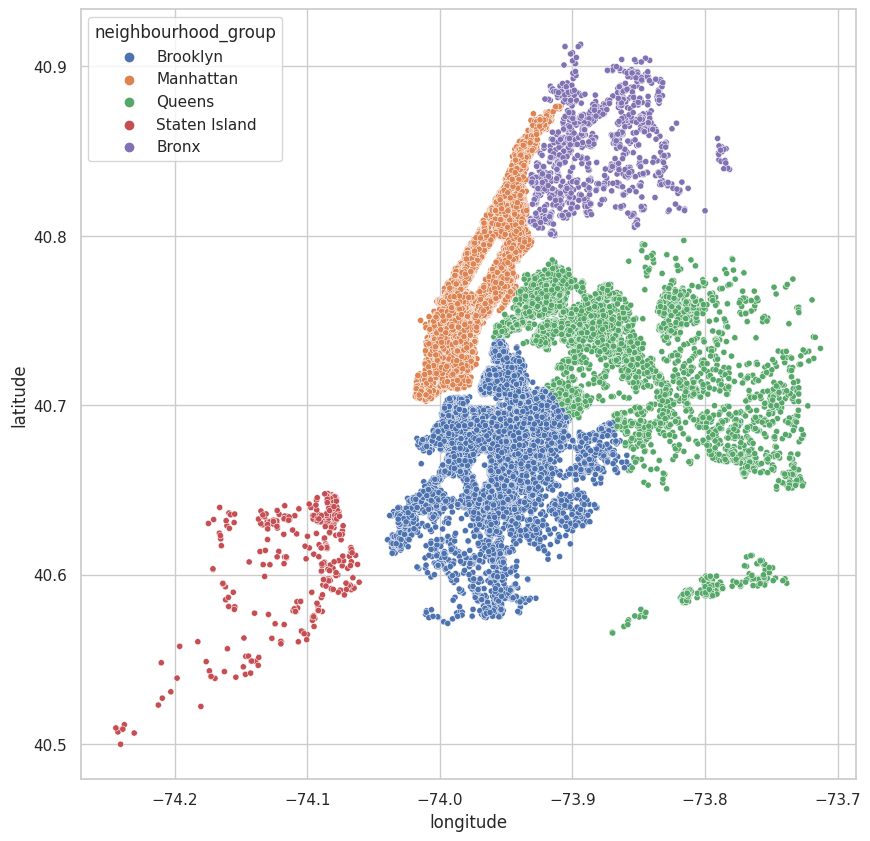

In [65]:
# Ref: https://www.kaggle.com/code/geowiz34/maps-of-nyc-airbnbs-with-python
plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group',s=20, data=df)
plt.show()